In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [168]:
df = pd.read_csv('mail_data.csv')

In [169]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [170]:
data = df.where( (pd.notnull(df)),'')

In [171]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [173]:
data.shape

(5572, 2)

In [174]:
data.loc[data['Category']=='spam','Category',]=0
data.loc[data['Category'] =='ham','Category',]=1

In [175]:
X = data['Message']
Y = data['Category']

In [176]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [177]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [179]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [180]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [181]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train= Y_train.astype('int')
Y_test=Y_test.astype('int')


In [182]:
print(X_train)

1978    Reply to win £100 weekly! Where will the 2006 ...
3989    Hello. Sort of out in town already. That . So ...
3935     How come guoyang go n tell her? Then u told her?
4078    Hey sathya till now we dint meet not even a si...
4086    Orange brings you ringtones from all time Char...
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 4457, dtype: object


In [183]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34840 stored elements and shape (4457, 7440)>
  Coords	Values
  (0, 5512)	0.1898892037332199
  (0, 7222)	0.2173884735352799
  (0, 258)	0.2379428657041507
  (0, 7162)	0.2550284465664535
  (0, 354)	0.3544175987866074
  (0, 2724)	0.3544175987866074
  (0, 7300)	0.24288153842988894
  (0, 2049)	0.3034375179183143
  (0, 3262)	0.33791755486732394
  (0, 5800)	0.17558937755823417
  (0, 6264)	0.1898892037332199
  (0, 694)	0.3171299579602537
  (0, 2497)	0.2442158912653505
  (0, 5818)	0.22682143517864364
  (1, 3267)	0.26787130770292167
  (1, 6109)	0.32397626344658004
  (1, 6738)	0.28986069568917994
  (1, 2335)	0.21623212751660786
  (1, 5650)	0.3604441444703179
  (1, 3333)	0.20665394084233094
  (1, 2440)	0.3387054464839871
  (1, 4509)	0.40282459910606705
  (1, 3932)	0.24325511357721422
  (1, 3804)	0.19029023465152678
  (1, 2555)	0.3840709491751003
  :	:
  (4452, 3084)	0.22948428918295163
  (4452, 3290)	0.26370969643076225
  (4452, 3978)	0

In [184]:
model = DecisionTreeClassifier()

In [185]:
model.fit(X_train_features,Y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [186]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [187]:
print('Acc on training data : ', accuracy_on_training_data)

Acc on training data :  1.0


In [188]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)


In [189]:
print('acc on test data : ', accuracy_on_test_data)

acc on test data :  0.967713004484305


In [190]:
input_your_mail = ["2	0	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

input_data_features = feature_extraction.transform(input_your_mail)

prediction = model.predict(input_data_features)

print(prediction)

if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')


[0]
Spam mail


In [191]:
# Set up figure size
plt.figure(figsize=(20, 10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

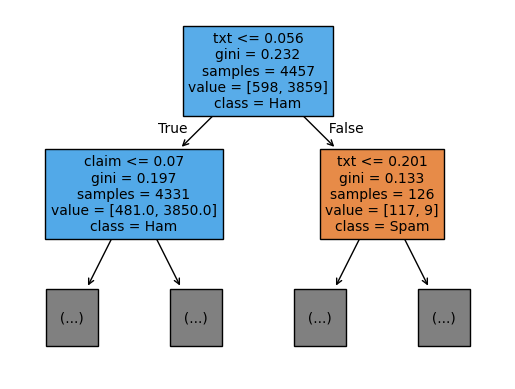

In [194]:
# Plot the decision tree
plot_tree(model, 
          filled=True, 
          max_depth=1,  # You can increase this, but 2-3 is good for clarity
          feature_names=feature_extraction.get_feature_names_out(), 
          class_names=['Spam', 'Ham'], 
          fontsize=10)

plt.show()